# Breast Cancer Prediction Using Machine Learning

### Brandon May

Breast cancer continues to be a significant culprit of morbidity and mortality, even today with our current medical advances.  The data that this dataset consists of was actually published in a medical journal article and data was collected at the University of Wisconsin (Wolberg, M.D. et al.¸1995). While this source is somewhat dated, my main goal with this project is to demonstrate that machine learning algorithms could be used to assist in cancer detection as adjunct to physician expertise.

__Problem Background:__

It is no secret that our healthcare is cumbersome, overpriced, and our outcomes are unsatisfactory when compared to other peer countries.  In a data-driven world, with the vast amounts of personal health information and data available in electronic health records, the sky is the limit.  Could machine learning algorithms be used to improve diagnosis, save lives, and prevent suffering?  

Breast cancer is the second most common cause of death due to cancer in women.  Using mammograms, women are screened for breast cancer.  Suspicious areas identified radiologically are then biopsied using a wide variety of techniques.  One method is using a fine needle aspirate in which cells from the area in question are extracted and examined under the microscope.  Even with expert analysis, diagnosis of these areas can be challenging.

Therefore, the question remains, can machine learning help us predict malignant tumors as an adjunct to physician expertise?

__Dataset Description:__ 

The data is from the University of California - Irvine Machine Learning Repository and can be found here:  [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

This data was collected at the University of Wisconsin in 1995.  The file is in a csv format in which microscopic images of Fine Needle Aspirates (a type of biopsy) of suspicious breast tissue was digitized.  There are a total of 32 variables with 570 subjects.  They were examining suspicious masses in those without evidence of metastasis (distant spread of cancer to other parts of the body).

After data cleaning, exploration, and analysis, the data will be fit and predictive ability evaluated using Logistic Regression, K Nearest Neighbors, and Random Forest machine learning algorithms.

# Data Cleaning, Exploration, and Analysis

In [1]:
#Loading Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Silencing Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset and Viewing It
df = pd.read_csv('breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
#Checking for Missing Values
df.isnull().values.any()

False

There are no null values in the dataset.

In [3]:
#Checking Datatypes to Ensure Coded Correctly
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The target variable is categorical and is coded as M for malignant and B for benign.  There are no missing data in the CSV file.  There are case identifiers but other demographic information such as age, co-morbidities, and family history are not available.

The variables examined include measurements of digitized images on both cell size and shape.  These were already identified as either benign or malignant.  The data aims to determine if these specific characteristics can be used to predict whether a tumor was malignant or benign.

### Description of the Variables

__Id:__ Number signifying unique samples (Integer)

__Diagnosis:__ M for Malignant, B for Benign (Categorical) – the Target

__Radius_mean:__ Mean of distance from center to points on the perimeter of tumor cell, cell size measure (Float)

__Texture_mean:__ Mean of grey-scale values of image (Float)

__Perimeter_mean:__ Expression of both cell size and shape (Float)

__Area_mean:__ Mean area of cell size (Float)

__Smoothness:__ Mean of cell smoothness and shape (Float)

__Compactness:__ Mean of cell compactness and shape (Float)

__Concavity_mean:__  Mean of cell concavity of image (Float)

__Concave points_mean:__ Mean of concave points (Float)

__Symmetry_mean:__ Mean of cell symmetry (Float)

__Fractal_dimension_mean:__ Mean of fractal dimension, measure of cell shape (Float)

__Radius_se:__ Standard error of distance from center to points on the perimeter of tumor cell, cell size measure (Float)

__Texture_se:__ Standard error of grey-scale values of image (Float)

__Perimeter_se:__ Standard error of both cell size and shape (Float)

__Area_se:__ Standard error of cell size area (Float)

__Smoothness_se:__ Standard error of cell smoothness (Float)

__Compactness_se:__ Standard error of cell compactness (Float)

__Concavity_se:__  Standard error of cell concavity of image (Float)

__Concave points_se:__ Standard error of concave points (Float)

__Symmetry_se:__ Standard error of cell symmetry (Float)

__Fractal_dimension_se:__ Standard error of fractal dimension (Float)

__Radius_worst:__ Worst measurement of distance from center to points on the perimeter of tumor cell, cell size measure (Float)

__Texture_worst:__ Worst measurement of grey-scale values of image (Float)

__Perimeter_worst:__ Worst measurement of both cell size and shape (Float)

__Area_worst:__ Worst measurement of cell size area (Float)

__Smoothness_worst:__ Worst measurement of cell smoothness (Float)

__Compactness_worst:__ Worst measurement of cell compactness (Float)

__Concavity_worst:__  Worst measurement of cell concavity of image (Float)

__Concave points_worst:__ Worst measurement of concave points (Float)

__Symmetry_worst:__ Worst measurement of cell symmetry (Float)

__Fractal_dimension_worst:__ Worst measurement of fractal dimension (Float)


In [4]:
#Dropping the ID column
df = df.drop(columns = "id")

#Renaming Columns with Spaces in the Names

df = df.rename(columns={'concave points_mean': 'concavepoints_mean', 'concave points_se': 'concavepoints_se', 'concave points_worst': 'concavepoints_worst'})

In [5]:
#Describing Dataset
print('Dataset Descriptive Statistics for Numerical Variables')
df.describe()

Dataset Descriptive Statistics for Numerical Variables


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#Dataset Description for Categorical Variable
print('Dataset Descriptive Statistics for Categorical Variable')
df.describe(include=['O'])

Dataset Descriptive Statistics for Categorical Variable


,diagnosis
count,569
unique,2
top,B
freq,357


The most common value was benign diagnoses of the categorical target variable.  Next step is to eliminate highly correlated variables from the dataset.

In [7]:
corr_matrix = df.corr()

#Selecting Upper Triangle of Correlation Matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#Find Index of Feature Columns with Correlations >0.90
to_drop = [column for column in upper.columns if any (upper[column] >0.95)]
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

Given the high rates of correlation of the above variables, we will drop them from the dataframe.  With a correlation >0.95, these are likely redundant and may introduce instability in our final algorithms.

In [8]:
#Dropping Highly Correlated Variables

df = df.drop(columns=['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst'])
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concavepoints_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
#Finding Outliers Using Interquartile Range

#Loading Packages
from scipy import stats

#Calculating Interquartile Range
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
print(IQR)

radius_mean                4.080000
texture_mean               5.630000
smoothness_mean            0.018930
compactness_mean           0.065480
concavity_mean             0.101140
concavepoints_mean         0.053690
symmetry_mean              0.033800
fractal_dimension_mean     0.008420
radius_se                  0.246500
texture_se                 0.640100
smoothness_se              0.002977
compactness_se             0.019370
concavity_se               0.026960
concavepoints_se           0.007072
symmetry_se                0.008320
fractal_dimension_se       0.002310
texture_worst              8.640000
smoothness_worst           0.029400
compactness_worst          0.191900
concavity_worst            0.268400
concavepoints_worst        0.096470
symmetry_worst             0.067500
fractal_dimension_worst    0.020620
dtype: float64


In [14]:
#Checking Which Values Fall Outside the Interquartile Range
(df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))

,compactness_mean,compactness_se,compactness_worst,concavepoints_mean,concavepoints_se,concavepoints_worst,concavity_mean,concavity_se,concavity_worst,diagnosis,...,radius_se,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,...,False,True,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,True,True,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


There were several outliers identified using the interquartile range.  There were various categories where the outliers were identified with a wide variety of variables.  The most common variable where it was noted was compactness.  The majority of these outliers were mostly identified as malignant though there were some benign diagnoses with outliers in the compactness variables.

Text(0.5, 1.0, 'Boxplot of Worst Fractal Dimension')

<Figure size 7200x7200 with 0 Axes>

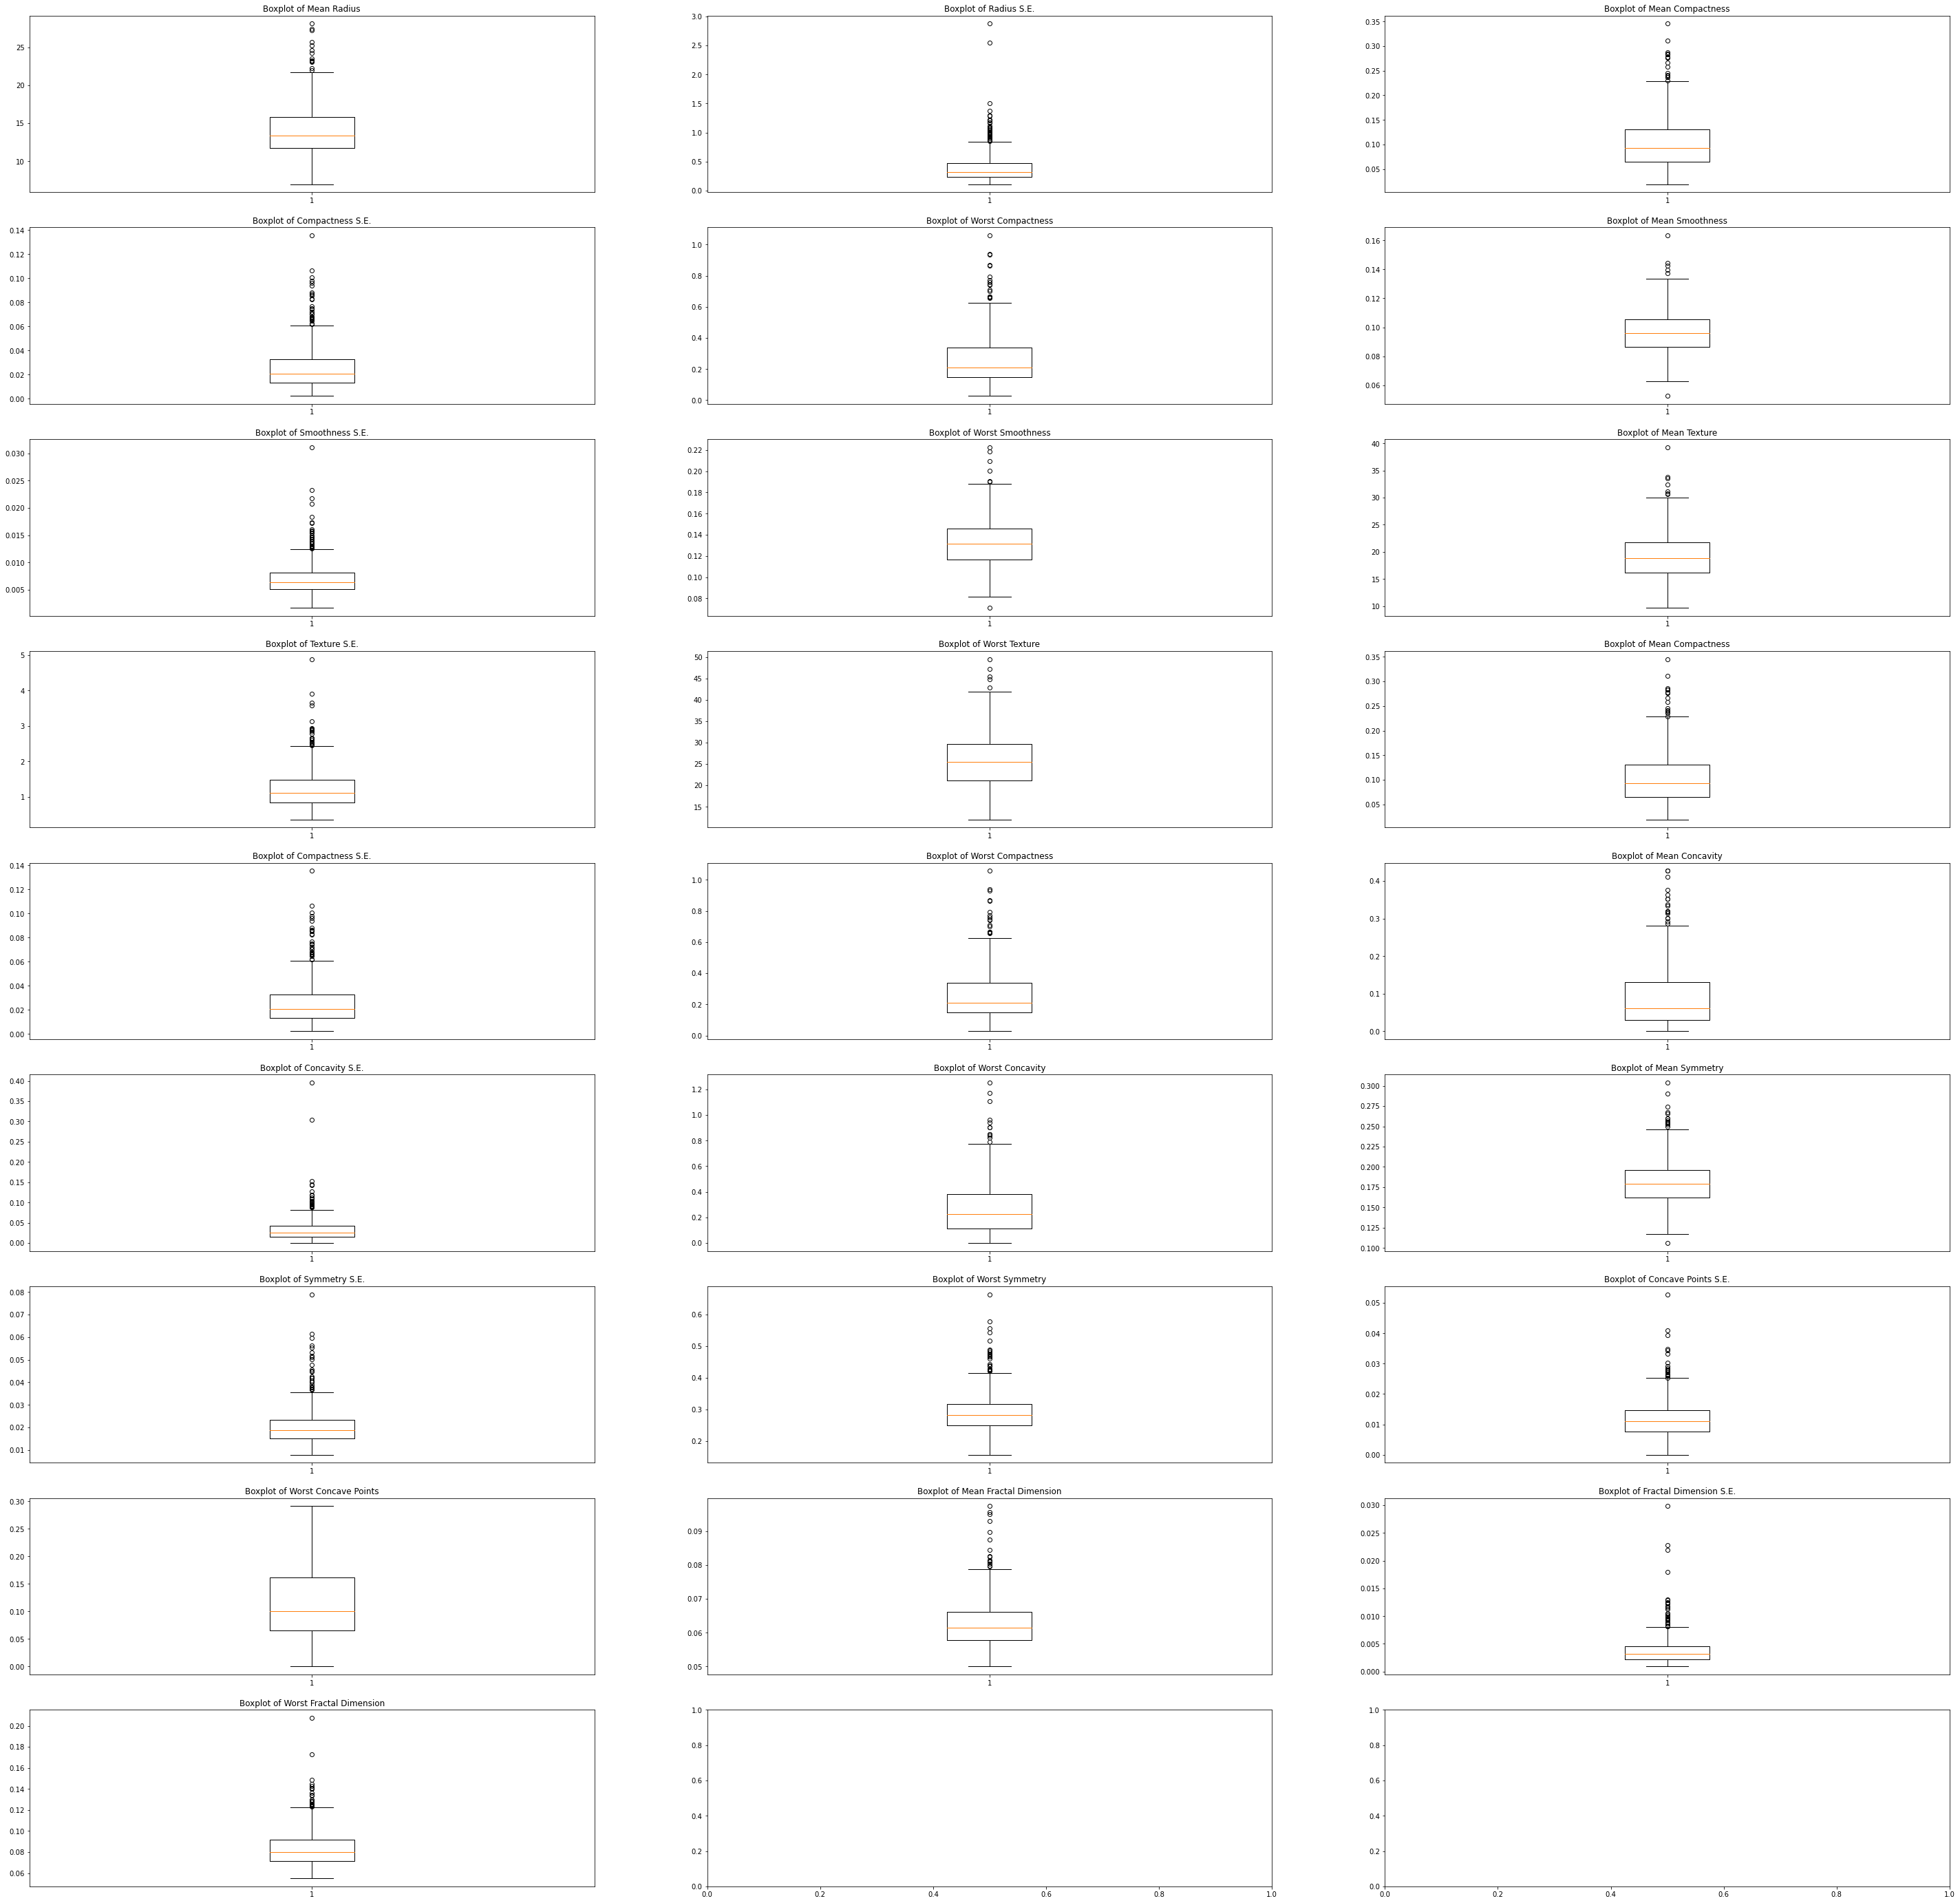

In [20]:
#Visualizing Outliers Using Boxplots

plt.figure(figsize=[100,100])

fig,axs = plt.subplots(9,3, figsize=(50, 50))

axs[0,0].boxplot(df['radius_mean'])
axs[0,0].set_title('Boxplot of Mean Radius')
axs[0,1].boxplot(df['radius_se'])
axs[0,1].set_title('Boxplot of Radius S.E.')
axs[0,2].boxplot(df['compactness_mean'])
axs[0,2].set_title('Boxplot of Mean Compactness')
axs[1,0].boxplot(df['compactness_se'])
axs[1,0].set_title('Boxplot of Compactness S.E.')
axs[1,1].boxplot(df['compactness_worst'])
axs[1,1].set_title('Boxplot of Worst Compactness')
axs[1,2].boxplot(df['smoothness_mean'])
axs[1,2].set_title('Boxplot of Mean Smoothness')
axs[2,0].boxplot(df['smoothness_se'])
axs[2,0].set_title('Boxplot of Smoothness S.E.')
axs[2,1].boxplot(df['smoothness_worst'])
axs[2,1].set_title('Boxplot of Worst Smoothness')
axs[2,2].boxplot(df['texture_mean'])
axs[2,2].set_title('Boxplot of Mean Texture')
axs[3,0].boxplot(df['texture_se'])
axs[3,0].set_title('Boxplot of Texture S.E.')
axs[3,1].boxplot(df['texture_worst'])
axs[3,1].set_title('Boxplot of Worst Texture')
axs[3,2].boxplot(df['compactness_mean'])
axs[3,2].set_title('Boxplot of Mean Compactness')
axs[4,0].boxplot(df['compactness_se'])
axs[4,0].set_title('Boxplot of Compactness S.E.')
axs[4,1].boxplot(df['compactness_worst'])
axs[4,1].set_title('Boxplot of Worst Compactness')
axs[4,2].boxplot(df['concavity_mean'])
axs[4,2].set_title('Boxplot of Mean Concavity')
axs[5,0].boxplot(df['concavity_se'])
axs[5,0].set_title('Boxplot of Concavity S.E.')
axs[5,1].boxplot(df['concavity_worst'])
axs[5,1].set_title('Boxplot of Worst Concavity')
axs[5,2].boxplot(df['symmetry_mean'])
axs[5,2].set_title('Boxplot of Mean Symmetry')
axs[6,0].boxplot(df['symmetry_se'])
axs[6,0].set_title('Boxplot of Symmetry S.E.')
axs[6,1].boxplot(df['symmetry_worst'])
axs[6,1].set_title('Boxplot of Worst Symmetry')
axs[6,2].boxplot(df['concavepoints_se'])
axs[6,2].set_title('Boxplot of Concave Points S.E.')
axs[7,0].boxplot(df['concavepoints_worst'])
axs[7,0].set_title('Boxplot of Worst Concave Points')
axs[7,1].boxplot(df['fractal_dimension_mean'])
axs[7,1].set_title('Boxplot of Mean Fractal Dimension')
axs[7,2].boxplot(df['fractal_dimension_se'])
axs[7,2].set_title('Boxplot of Fractal Dimension S.E.')
axs[8,0].boxplot(df['fractal_dimension_worst'])
axs[8,0].set_title('Boxplot of Worst Fractal Dimension')


Many of the variables had outliers on the positive end of their measurement spectrum.  Given that these outliers could be predictive of being malignant, these will not be removed from the dataset.

<Figure size 7200x7200 with 0 Axes>

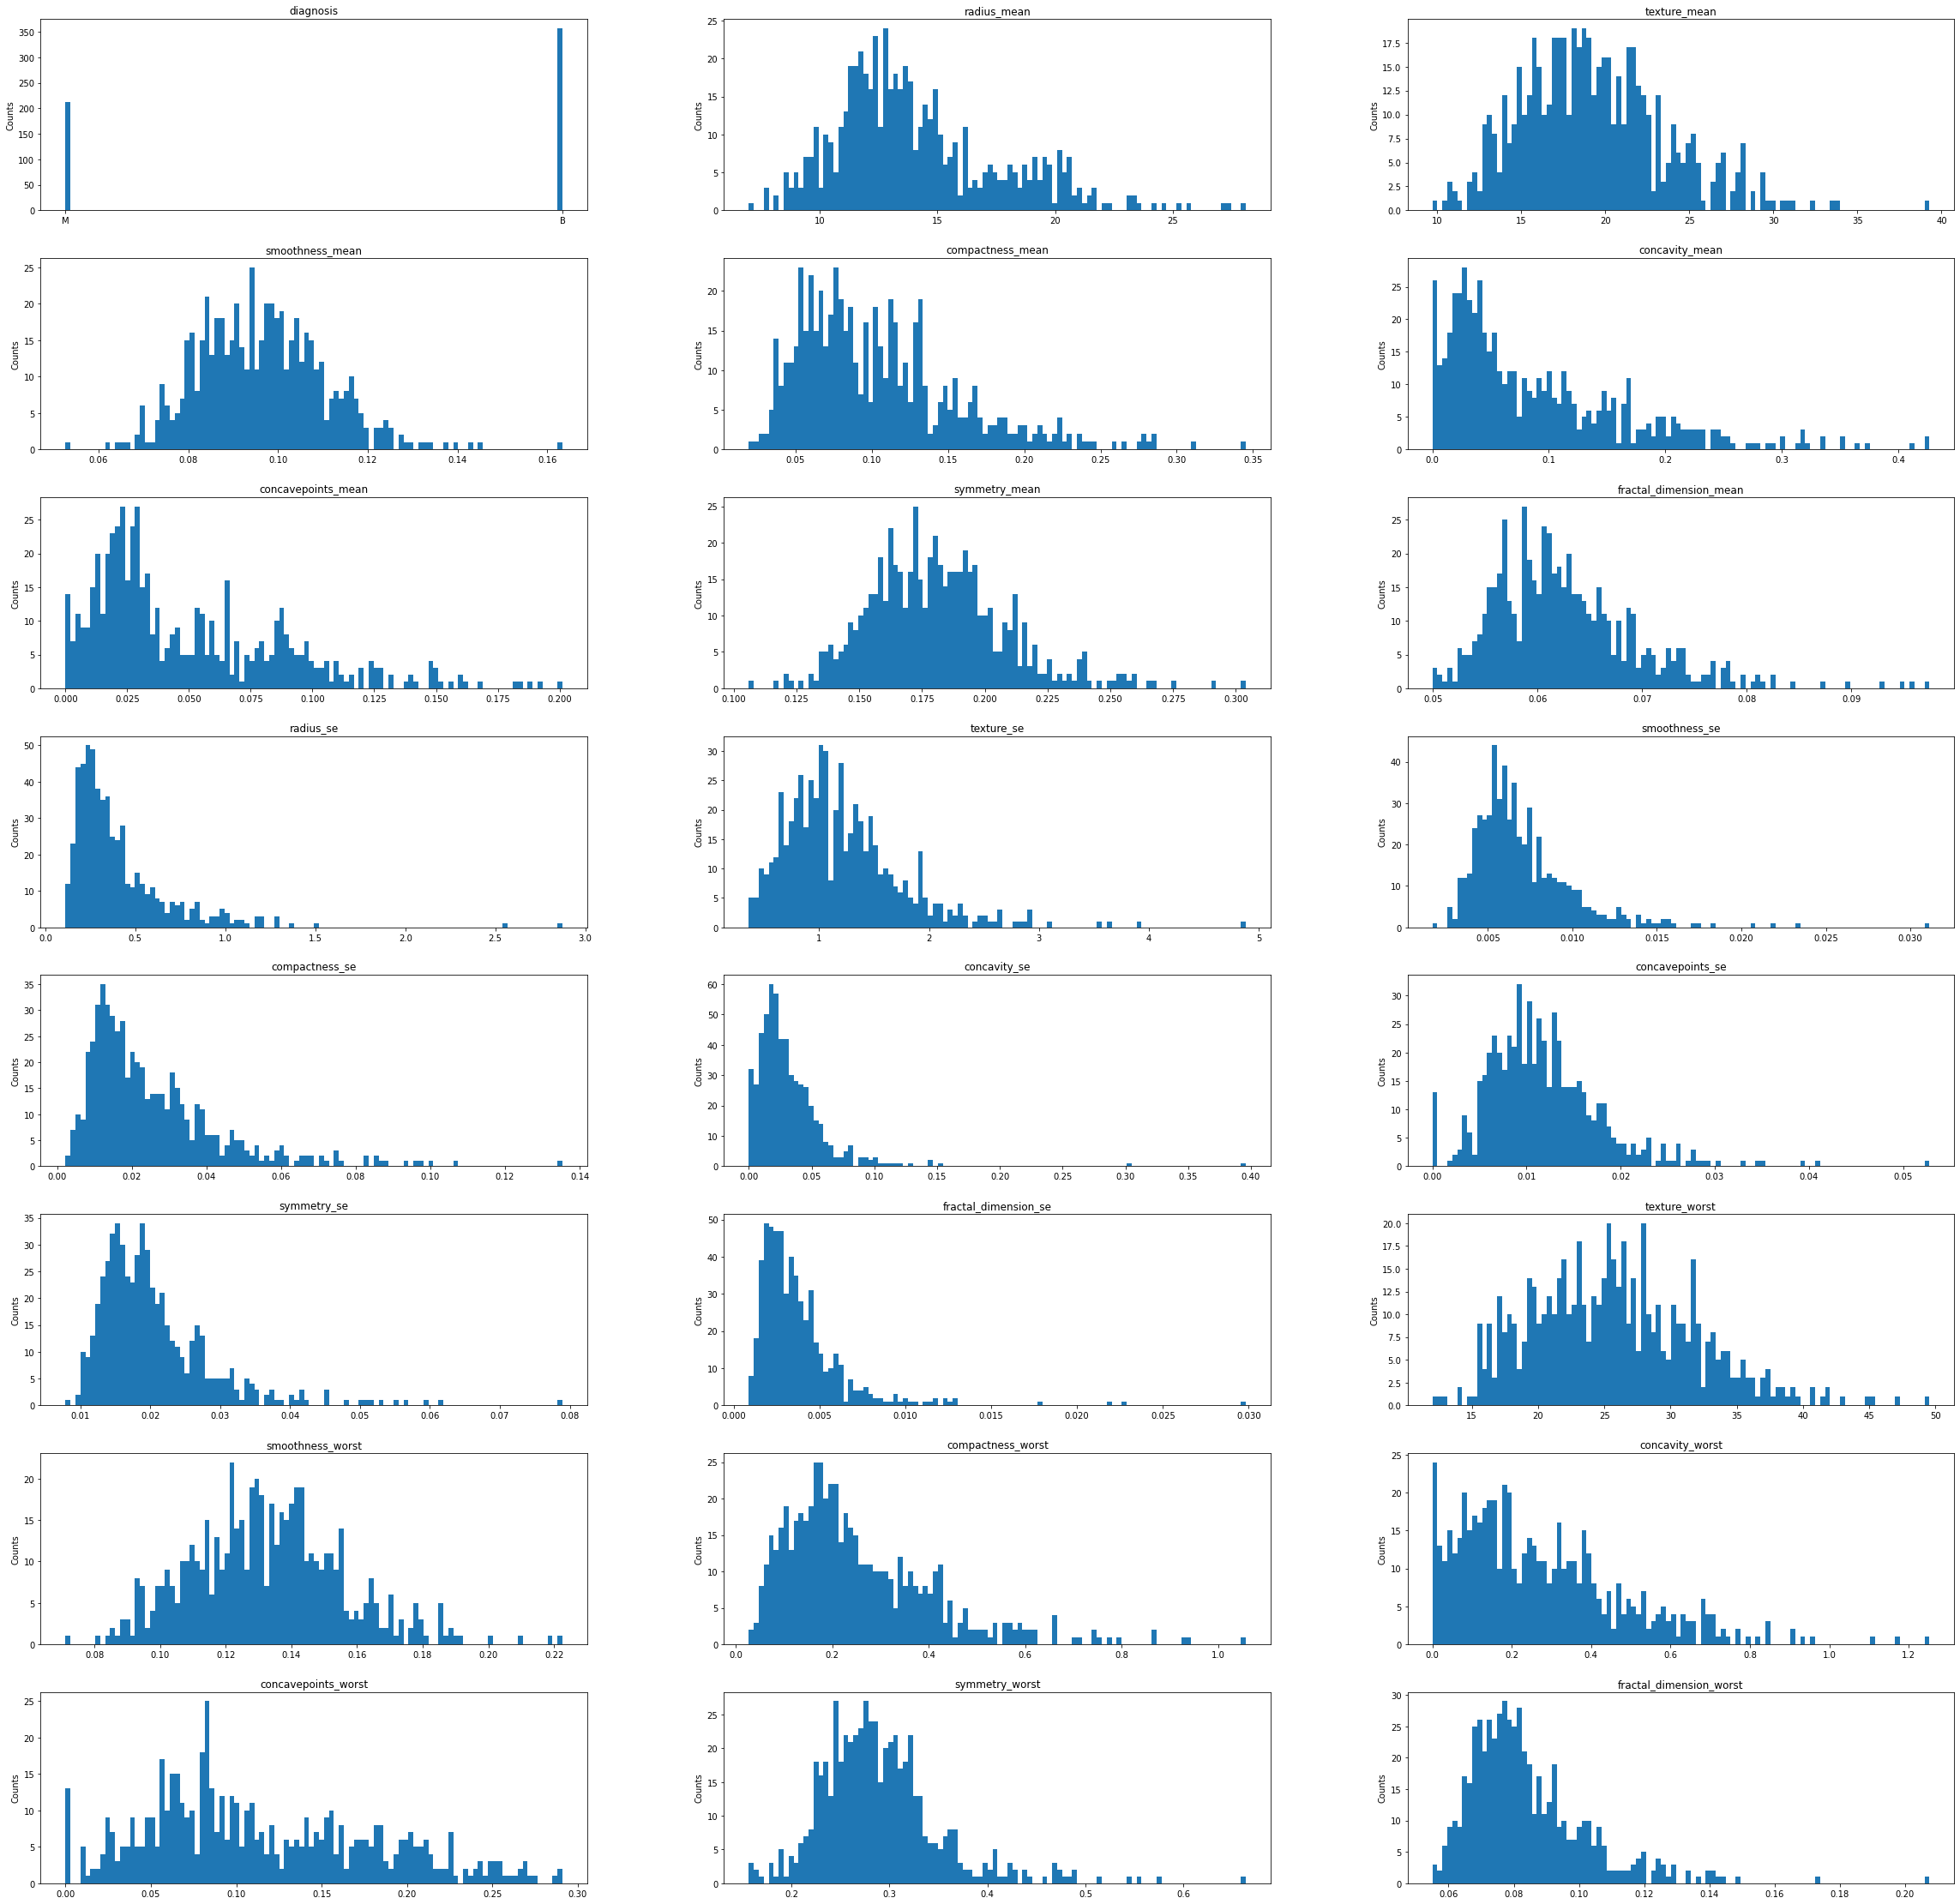

In [27]:
#Visualizing Distributions of Numerical Data

#Setting Figure Size
plt.figure(figsize=[100,100])

f,a = plt.subplots(8,3, figsize=(40,40))
plt.subplots_adjust(hspace=0.25, wspace = 0.25)

a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df.iloc[:,idx], bins=100)
    ax.set_title(df.columns[idx])
    ax.set_ylabel('Counts')
plt.show()

Many of these variables are positively skewed.  The only variables that appear to be mostly normally distributed are symmetry_mean and possible fractal_dimension_mean.  Concave_points_worst actually appears to be bimodal.

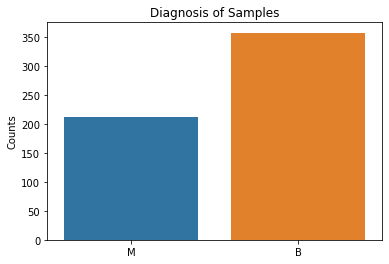

In [28]:
import seaborn as sns

sns.countplot(x = 'diagnosis', data = df)
plt.title('Diagnosis of Samples')
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

Our target variable has approximately 150 more benign samples than malignant samples.  While it is expected that benign values would likely outnumber malignant values, this means that accuracy as a target metric for our machine learning algorithms will be deceptively high.  We will focus on the F1, precision, and recall scores instead.

While these values are skewed which could affect the model, the outliers could also be possibly correlated with more malignant disease.  I will not transform these skewed values to be as accurate as possible.

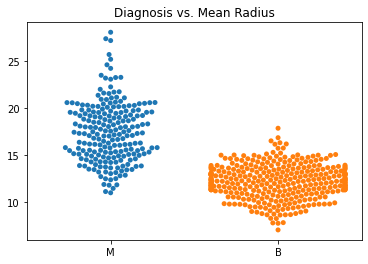

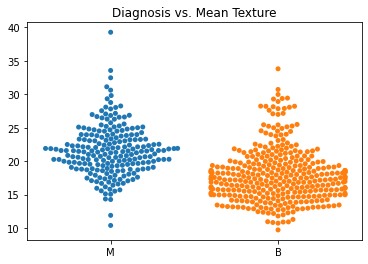

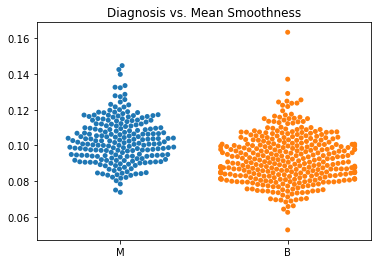

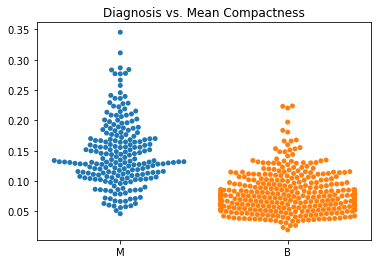

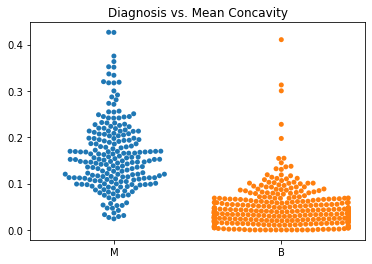

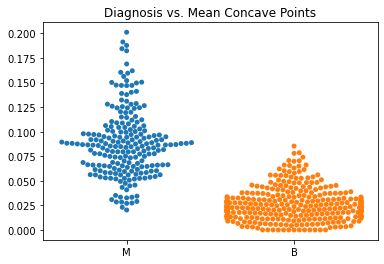

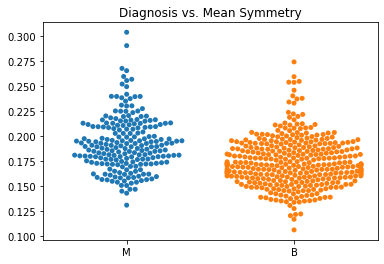

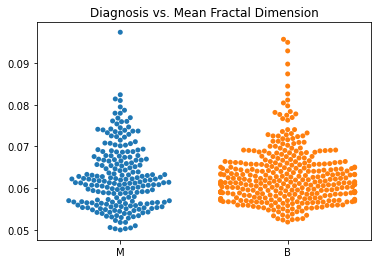

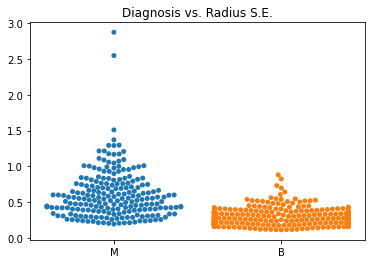

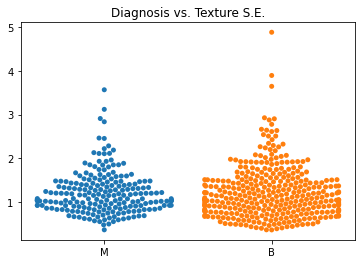

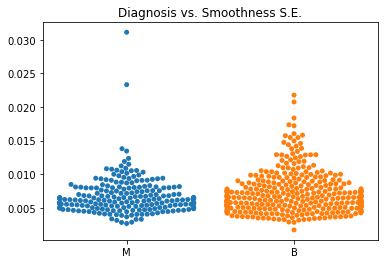

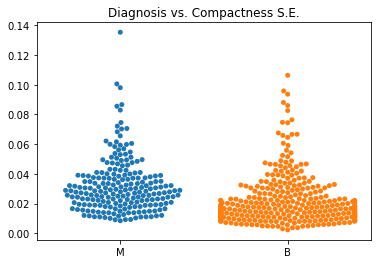

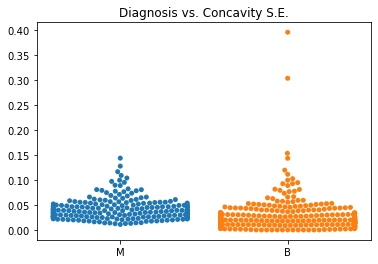

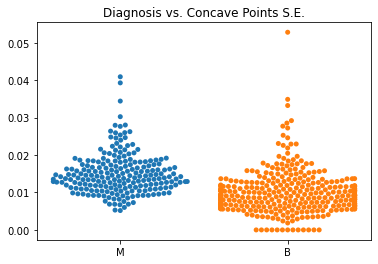

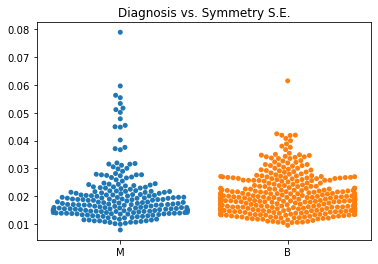

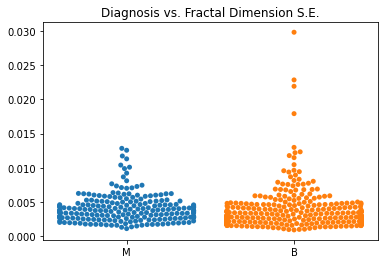

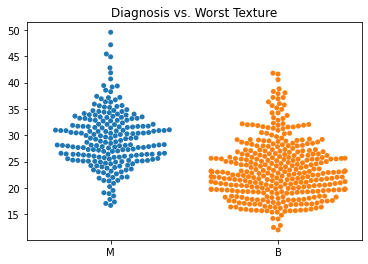

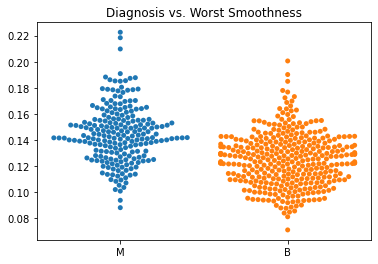

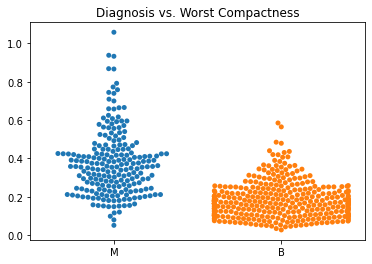

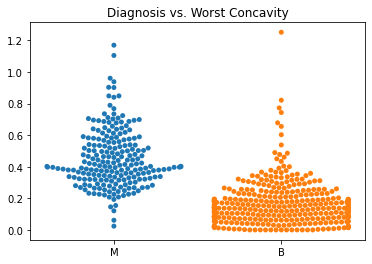

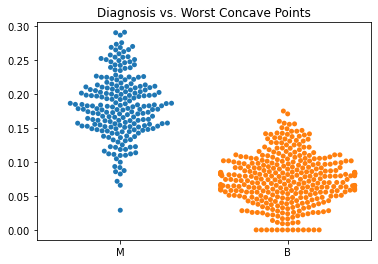

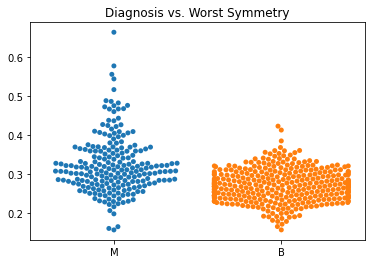

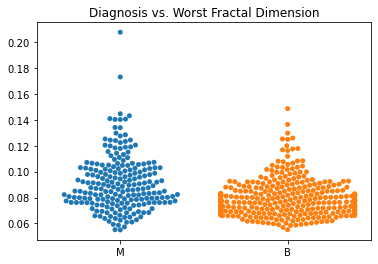

In [25]:
#Comparing Target Variable with our Explanatory Variables

#Setting Parameters
categories = df.diagnosis

sns.swarmplot(categories, df.radius_mean)
plt.title('Diagnosis vs. Mean Radius')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.texture_mean)
plt.title('Diagnosis vs. Mean Texture')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.smoothness_mean)
plt.title('Diagnosis vs. Mean Smoothness')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.compactness_mean)
plt.title('Diagnosis vs. Mean Compactness')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.concavity_mean)
plt.title('Diagnosis vs. Mean Concavity')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.concavepoints_mean)
plt.title('Diagnosis vs. Mean Concave Points')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.symmetry_mean)
plt.title('Diagnosis vs. Mean Symmetry')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.fractal_dimension_mean)
plt.title('Diagnosis vs. Mean Fractal Dimension')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.radius_se)
plt.title('Diagnosis vs. Radius S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.texture_se)
plt.title('Diagnosis vs. Texture S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.smoothness_se)
plt.title('Diagnosis vs. Smoothness S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.compactness_se)
plt.title('Diagnosis vs. Compactness S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.concavity_se)
plt.title('Diagnosis vs. Concavity S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.concavepoints_se)
plt.title('Diagnosis vs. Concave Points S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.symmetry_se)
plt.title('Diagnosis vs. Symmetry S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.fractal_dimension_se)
plt.title('Diagnosis vs. Fractal Dimension S.E.')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.texture_worst)
plt.title('Diagnosis vs. Worst Texture')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.smoothness_worst)
plt.title('Diagnosis vs. Worst Smoothness')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.compactness_worst)
plt.title('Diagnosis vs. Worst Compactness')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.concavity_worst)
plt.title('Diagnosis vs. Worst Concavity')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.concavepoints_worst)
plt.title('Diagnosis vs. Worst Concave Points')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.symmetry_worst)
plt.title('Diagnosis vs. Worst Symmetry')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

sns.swarmplot(categories, df.fractal_dimension_worst)
plt.title('Diagnosis vs. Worst Fractal Dimension')
plt.xlabel(xlabel = None)
plt.ylabel(ylabel = None)
plt.show()

Looking at the comparisons of our predictor variables vs. their diagnosis of malignant or benign, there are several interesting factors.  While there were some outliers, I still will keep these in the datasets for now.  In general, the malignant tumors seemed to have higher worst symmetry scores, worst concave points, worst concavity, worst compactness, and texture worst values.

In general, the mean values for many of the predictor variables tended to be higher with malignant diagnoses versus benign diagnoses.  Further, the worst values for the predictor variables also tended to be higher with malignant diagnoses versus benign diagnoses.  The standard error values for the predictors tended to be equivalent between the malignant and benign diagnoses.

## Machine Learning Fitting and Prediction

In general, the goal of these machine learning algorithms wouuld be to eliminate false negatives as much as possible.  For example, we would not want our models to predict a benign diagnosis when a cancer was present.  This would be devastating.  While false positives (predicting cancer when it is benign) would be quite distressing, it would not be fatal as a missed cancer diagnosis was.  The algorithms will be judged on this ability as well as Precision, Recall, and F1 scores.

### Logistic Regression

In [29]:
#Running Logistic Regression Method to Predict Malignant or Benign

#Importing Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#Creating Features and Target Objects
features = df.loc[:, df.columns != 'diagnosis']
target = df['diagnosis']

#Creating Standardizer
standardizer = StandardScaler()

#Creating Logistic Regression Object
logit = LogisticRegression()

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state =1)

#Fitting Data to Logistic Regression Classifier
logreg = logit.fit(features_train, target_train)

#Generating Confusion Matrix/Classification Report
target_pred = logit.predict(features_test)
test0 = np.array(target_test)
predictions0 = np.array(target_pred)
print("Confusion Matrix:\n", confusion_matrix(test0, predictions0),'\n')
print("Classification Report:\n", classification_report(test0, predictions0))

Confusion Matrix:
 [[71  1]
 [ 2 40]] 

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



This model performed quite well.  There were 2 misclassifications of benign lesions that were actually malignant.  F1 score for benign lesions was 0.98 and malignant lesions was 0.96 which are quite high.  Next we will check the feature importance of the different factors in the model based on their coefficients.

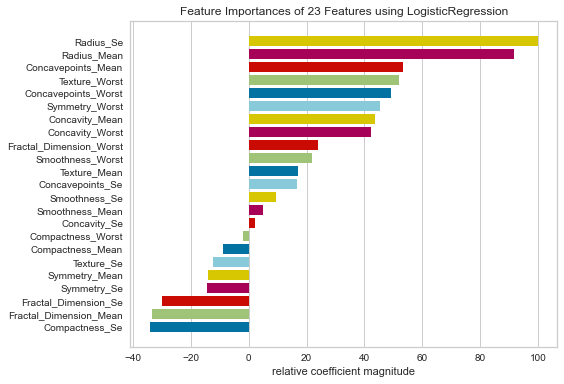

In [30]:
#Checking Feature Importance Based on Coefficients

#Importing Packages
from yellowbrick.model_selection import FeatureImportances

#Getting Labels and Checking Feature Importances For Logistic Regression Model
labels = list(map(lambda x: x.title(), features))
viz = FeatureImportances(logreg, labels=labels)
viz.fit(features_train, features_test)
viz.show()

Looking at the relative feature importance using the logistic regression model, radius_se, radius_mean, concavepoints_mean, texture/concavepoints/symmetry worst and concavity_mean/worst all had fairly high relative importances based on their coefficients.

It is not surprising that the radius mean and standard error values were highly important in the model since cell size is proportional to malignant cells (generally).  It is also interesting that there were a lot of variables with worst values that were highly important.  This could suggest that the values that are the most abnormal could be associated with predicting malignant or benign lesions.

### K Nearest Neighbors

In [31]:
#Running KNN To Predict Malignant or Benign

#Using Same Features and Target as Previous Example though Will Need to Get Dummy Variables for Target
target = pd.get_dummies(df['diagnosis'])

#Importing Packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Creating Standardizer
standardizer = StandardScaler()

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train/Teset 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

#Creating KNN Object With K of 3 Before Hyperparameter Tuning
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

#Fitting Classifier on Training Data
knn.fit(features_train, target_train)

#Creating Confusion Matrix/Classification Report
target_pred = knn.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print("Confusion Matrix:\n", confusion_matrix(test, predictions),'\n')
print("Classification Report:\n", classification_report(test, predictions))

Confusion Matrix:
 [[69  3]
 [ 7 35]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [32]:
#Hyperparameter Tuning for KNN Using GridSearch CV

#Creating Hyperparameter Grid
param_dist1 = {"leaf_size": list(range(1,50)),
              "n_neighbors": list(range(1,30)),
              "p": [1,2]}

#Creating New KNN Object
knn_2 = KNeighborsClassifier()

#Using GridSearch Object
clf = GridSearchCV(knn_2, param_dist1, cv=10, n_jobs = -1)

#Fitting Model
best_model = clf.fit(features_standardized, target)

print('Best Leaf Size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Metric:', best_model.best_estimator_.get_params()['metric'])
print('Best Weights:', best_model.best_estimator_.get_params()['weights'])#Runin

Best Leaf Size: 1
Best p: 1
Best n_neighbors: 7
Best Metric: minkowski
Best Weights: uniform


In [33]:
#Rerunning KNN Using Our Tuned Parameters

#Creating Standardizer
standardizer = StandardScaler()

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train/Teset 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

#Creating KNN Object With K of 3 Before Hyperparameter Tuning
knn = KNeighborsClassifier(n_neighbors = 7, p = 1, leaf_size = 1, metric = "minkowski", weights = "uniform", n_jobs = -1)

#Fitting Classifier on Training Data
knn.fit(features_train, target_train)

#Creating Confusion Matrix/Classification Report
target_pred = knn.predict(features_test)
test = np.array(target_test).argmax(axis=1)
predictions = np.array(target_pred).argmax(axis=1)
print("Confusion Matrix:\n", confusion_matrix(test, predictions),'\n')
print("Classification Report:\n", classification_report(test, predictions))

Confusion Matrix:
 [[70  2]
 [ 7 35]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



Feature importance was not done on the KNN model since it is not directly applicable to this algorithm.  However, this model performed worse than the logistic regression model with F1-scores of 0.94 for benign lesions and 0.89 for malignant lesions.  There were also 7 false negatives, which is much higher than the Logistic Regression model.

### Random Forest Algorithm

In [34]:
#Running Random Forest Algorithm on Data

#Importing Packages
from sklearn.ensemble import RandomForestClassifier

#Resetting Features and Targets
features = df.loc[:, df.columns != 'diagnosis']
target = df['diagnosis']

#Creating Standardizer
standardizer = StandardScaler()

#Standardizing Features
features_standardized = standardizer.fit_transform(features)

#Train/Teset 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 1)

#Creating Random Forest Object
rf = RandomForestClassifier(n_estimators= 100, random_state = 1)

#Fitting Classifier on Training Data
rf.fit(features_train, target_train)

#Creating Confusion Matrix/Classification Report
target_pred = rf.predict(features_test)
test = np.array(target_test)
predictions = np.array(target_pred)
print("Confusion Matrix:\n", confusion_matrix(test, predictions),'\n')
print("Classification Report:\n", classification_report(test, predictions))

Confusion Matrix:
 [[72  0]
 [ 5 37]] 

Classification Report:
               precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



The random forest model performed slightly better than the KNN model with an F1 score of 0.97 for benign lesions and an F1 score of 0.94 for malignant lesions.  Of more concern is that 5 benign lesions were classified as benign when they were actually malignant.

Next, for comparison between this and the logistic regression model, we'll rank feature importance in this model as well.

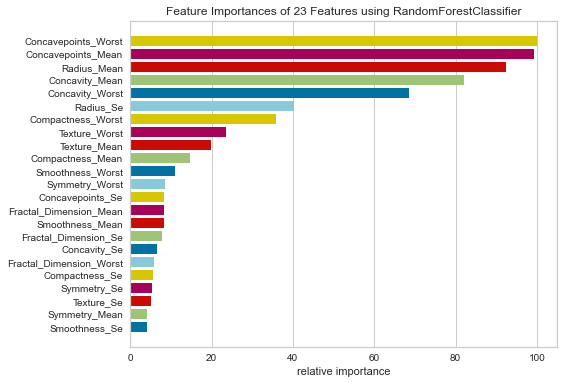

In [35]:
#Ranking Feature Importance Based on the Random Forest Algorithm

labels1 = list(map(lambda x: x.title(), features))
viz = FeatureImportances(rf, labels=labels)
viz.fit(features_train, features_test)
viz.show()

The results of this were quite interesting as well.  Concavepoints_worst, concavepoints_mean, radius_mean, concavity_mean, and concavity_worst were all ranked highly with relative importance.  These are very similar to the logistic regression model.

This would seem to suggest that radius_mean and concavepoints_worst/mean all seem to be important whichever model you are using and perhaps could be a focus of future projects.

_verall, the Logistic Regression model seems to be the best option of the three models tested.  Due to the imbalanced target class, accuracy alone is not a good measure of performance since in an unbalanced class, the algorithm by chance could be more likely to guess a certain outcome because it knows that that is the most likely answer.

The F1 scores for the Logistic Regression model were the highest of the 3 models tested.  This model also minimized the number of false negatives or missed cancer diagnoses.

Limitations of this dataset include older data as well as limited data points.  Further projects would require thousands, perhaps millions of more current data points.  Healthcare demographics as well as cancer diagnosis and treatment standards of care change rapidly so current data is paramount.

This project demonstrates that machine learning could be potentially useful as an adjunct to standard patient care.  The goal is not to replace doctors; on the contrary, doctors are required to be on the forefront treating patients and are still experts in the field.  However, the goal should be to use machine learning models as an adjunct to flag potentially high-risk findings that should be further investigated before disregarding.  This could be something as simple as the model indicating that there are several highly suspicious features of malignancy and have a physician review for final diagnosis to either concur or dispute that result.  Outcome improvement is paramount; a healthcare system must strive to deliver the best quality care as possible.  This is a basic tenet of treating patients and this project suggests that machine learning could potentially help healthcare workers improve outcomes and make patient’s lives better.